In [1]:
import scipy.io.wavfile as wav
import tensorflow as tf
import cv2 
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
from math import exp
from google.colab.patches import cv2_imshow as show
import re
import os
import shutil
import librosa

In [2]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1qHd-N5hezjoJDzu_JkFQ8a6_xFht4Vq_' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1qHd-N5hezjoJDzu_JkFQ8a6_xFht4Vq_" -O train1.zip && rm -rf /tmp/cookies.txt
!unzip train1.zip

#https://drive.google.com/file/d/1qHd-N5hezjoJDzu_JkFQ8a6_xFht4Vq_/view?usp=sharing

subjects=os.listdir("/content/train")
for i in subjects:
    path1=os.path.join("/content/train",os.path.join(i,'wav'))
    path2=os.path.join("/content/train",os.path.join(i,'thr'))
    shutil.rmtree(path1,ignore_errors=True)
    shutil.rmtree(path2,ignore_errors=True)

Streaming output truncated to the last 5000 lines.
  inflating: train/sub_3/wav/3_2_2_9_1177_1.wav  
  inflating: train/sub_3/wav/3_1_2_2_298_1.wav  
  inflating: train/sub_3/wav/3_2_2_5_1108_1.wav  
  inflating: train/sub_3/wav/3_1_2_3_514_1.wav  
  inflating: train/sub_3/wav/3_1_2_9_497_1.wav  
  inflating: train/sub_3/wav/3_2_2_1_1283_1.wav  
  inflating: train/sub_3/wav/3_1_2_6_518_1.wav  
  inflating: train/sub_3/wav/3_2_2_7_33_1.wav  
  inflating: train/sub_3/wav/3_2_2_4_150_1.wav  
  inflating: train/sub_3/wav/3_2_2_1_970_1.wav  
  inflating: train/sub_3/wav/3_1_2_6_111_1.wav  
  inflating: train/sub_3/wav/3_1_2_4_290_1.wav  
  inflating: train/sub_3/wav/3_2_2_4_1030_1.wav  
  inflating: train/sub_3/wav/3_1_2_5_790_1.wav  
  inflating: train/sub_3/wav/3_1_2_5_605_1.wav  
  inflating: train/sub_3/wav/3_2_2_3_180_1.wav  
  inflating: train/sub_3/wav/3_1_2_3_1008_1.wav  
  inflating: train/sub_3/wav/3_2_2_5_964_1.wav  
  inflating: train/sub_3/wav/3_2_2_7_1254_1.wav  
  inflating: 

In [3]:
#VOICE FEATURES

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1CzjRSRbEglq8MZC-loxumBXhwEtEYmUD' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1CzjRSRbEglq8MZC-loxumBXhwEtEYmUD" -O voicefeature_train.zip && rm -rf /tmp/cookies.txt
!unzip voicefeature_train.zip

#https://drive.google.com/file/d/1CzjRSRbEglq8MZC-loxumBXhwEtEYmUD/view?usp=sharing

--2023-04-12 13:52:48--  https://docs.google.com/uc?export=download&confirm=&id=1CzjRSRbEglq8MZC-loxumBXhwEtEYmUD
Resolving docs.google.com (docs.google.com)... 74.125.68.100, 74.125.68.101, 74.125.68.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.68.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-8c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/erssgrserl6toql072j93kobdk75ekek/1681307550000/04390747349598417958/*/1CzjRSRbEglq8MZC-loxumBXhwEtEYmUD?e=download&uuid=cb4aa8d9-4350-4aa6-b763-916e79fdc1d2 [following]
--2023-04-12 13:52:55--  https://doc-0c-8c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/erssgrserl6toql072j93kobdk75ekek/1681307550000/04390747349598417958/*/1CzjRSRbEglq8MZC-loxumBXhwEtEYmUD?e=download&uuid=cb4aa8d9-4350-4aa6-b763-916e79fdc1d2
Resolving doc-0c-8c-docs.googleusercontent.com (doc-0c-8c-docs.googleusercontent.com)... 142.250.4.132, 2404:6

In [4]:
import numpy as np
import cv2 as cv

In [5]:
import tensorflow as tf
Train1=tf.keras.utils.image_dataset_from_directory('/content/train',
    color_mode='grayscale',
    batch_size=32,
    image_size=(128, 128),
    crop_to_aspect_ratio=True,
    shuffle=False,
    validation_split=0.2,
    subset="training",
)
val1=tf.keras.utils.image_dataset_from_directory('/content/train',
    color_mode='grayscale',
    batch_size=32,
    image_size=(128, 128),
    crop_to_aspect_ratio=True,
    shuffle=False,
    validation_split=0.2,
    subset="validation",
)

Found 1882 files belonging to 20 classes.
Using 1506 files for training.
Found 1882 files belonging to 20 classes.
Using 376 files for validation.


In [6]:
Train2=tf.keras.utils.image_dataset_from_directory('/content/content/voicefeature_train',
    color_mode='grayscale',
    batch_size=32,
    image_size=(128, 128),
    crop_to_aspect_ratio=True,
    shuffle=False,
    validation_split=0.2,
    subset="training",
)
val2=tf.keras.utils.image_dataset_from_directory('/content/content/voicefeature_train',
    color_mode='grayscale',
    batch_size=32,
    image_size=(128, 128),
    crop_to_aspect_ratio=True,
    shuffle=False,
    validation_split=0.2,
    subset="validation",
)

Found 1882 files belonging to 21 classes.
Using 1506 files for training.
Found 1882 files belonging to 21 classes.
Using 376 files for validation.


In [7]:
Train=tf.data.Dataset.zip((Train1,Train2))#img,label,feature,label
Val=tf.data.Dataset.zip((val1,val2))#img,label,feature,label

In [8]:
def mapingFunc(d1,d2):
    print(d2[0])
    return (((d1[0],d2[0])),d1[1])#(img,feature),label

In [9]:
Train=Train.map(mapingFunc)
Val=Val.map(mapingFunc)

Tensor("args_2:0", shape=(None, 128, 128, 1), dtype=float32)
Tensor("args_2:0", shape=(None, 128, 128, 1), dtype=float32)


tf.Tensor(
[16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16
 16 16 16 16 16 16 16 16], shape=(32,), dtype=int32)
tf.Tensor(
[16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16
 16 16 16 16 16 16 16 16], shape=(32,), dtype=int32)
tf.Tensor(
[16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16
 16 16 16 16 16 17 17 17], shape=(32,), dtype=int32)
tf.Tensor(
[17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 17 17 17 17 17 17 17 17], shape=(32,), dtype=int32)
tf.Tensor(
[17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 17 17 17 17 17 17 17 17], shape=(32,), dtype=int32)
tf.Tensor(
[17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 17 17 17 17 17 17 17 17], shape=(32,), dtype=int32)
tf.Tensor(
[18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
 18 18 18 18 18 18 18 18], shape=(32,), dtype=int32)
tf.Tensor(
[18 18 18 18 18 18 18 18 18 18

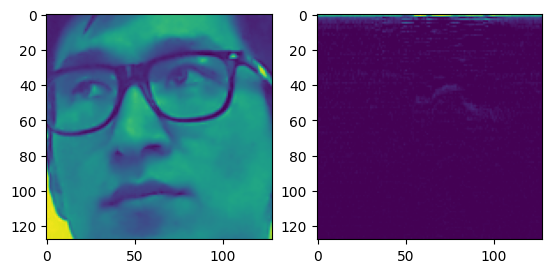

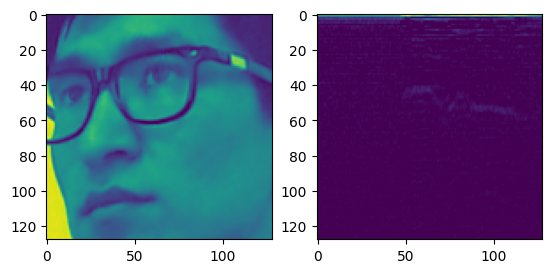

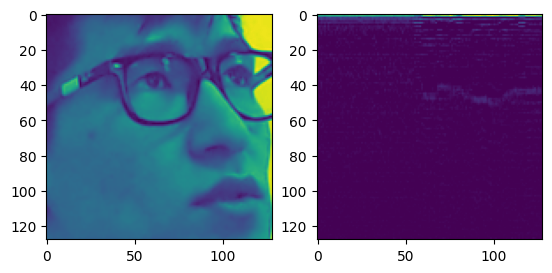

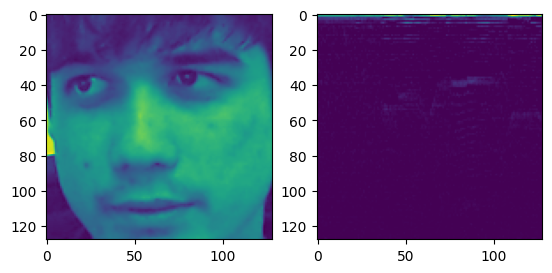

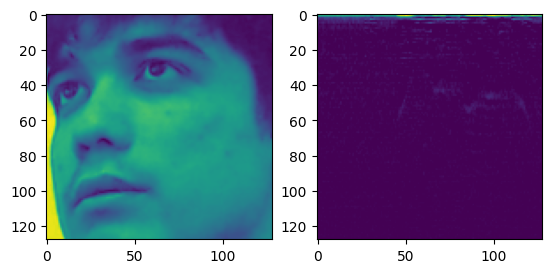

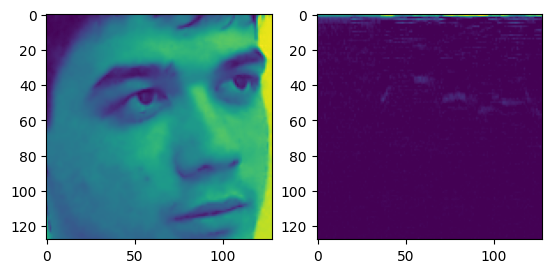

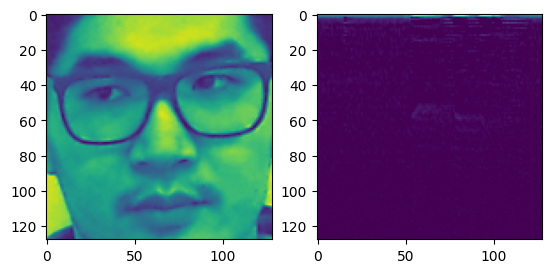

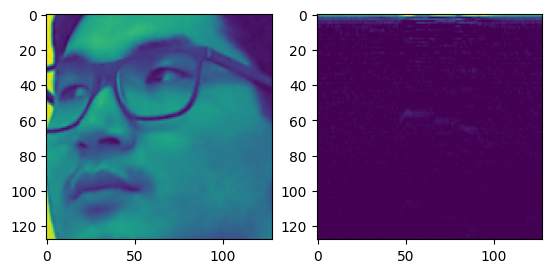

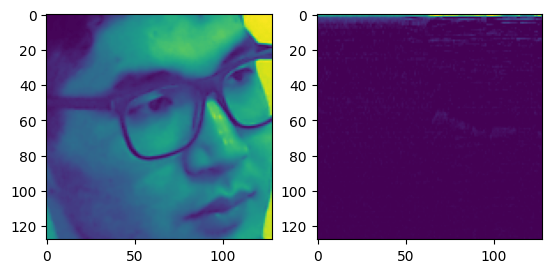

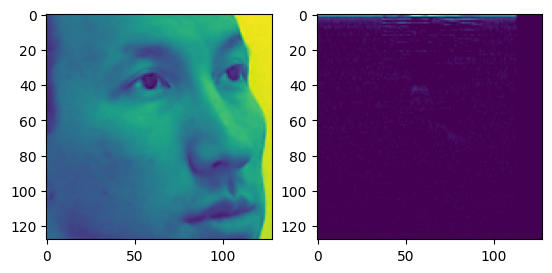

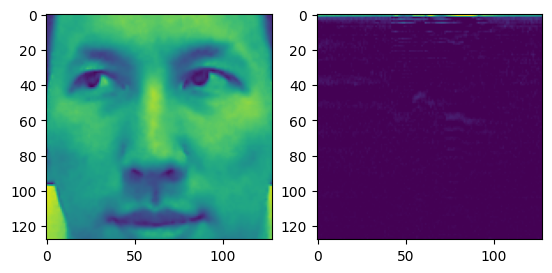

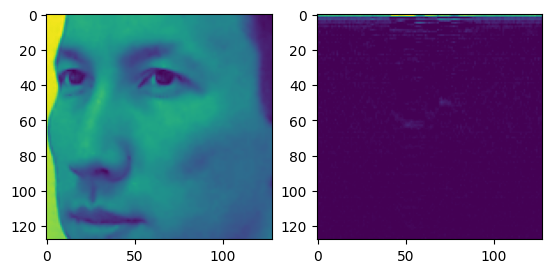

In [10]:
import matplotlib.pyplot as plt
for (img,feature),label in Val.take(20):
    num=8
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(img[num])
    plt.subplot(1,2,2)
    plt.imshow(feature[num])
    print(label)


In [11]:
Train.element_spec

((TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name=None)),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [12]:
IMG_WIDTH=128
IMG_HEIGHT=128
IMG_CHANNELS=1
N=20

In [13]:
import tensorflow as tf
class Summation(tf.keras.layers.Layer):
    def __init__(self,**kwargs):    
        # self.output_dim =output
        super(Summation, self).__init__(**kwargs)
    def build(self, input_shape): 
        # self.kernel = self.add_weight(name = 'kernel', 
        #     shape = (input_shape[1], input_shape[-1]), 
        #     initializer = 'normal', trainable = False) 
        super(Summation, self).build(input_shape)
    def call(self, input1,input2,input3): 
        return (input1+input2+input3)/3

In [14]:
class sharedConvLayers(tf.keras.Model):
  def __init__(self):
    super(sharedConvLayers, self).__init__(name='')
    self.conv1=tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding='same')
    self.conv2=tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding='same')
    self.max1=tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))

    self.conv3=tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')
    self.conv4=tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')
    self.max2=tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))

    self.conv5=tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same')
    self.conv6=tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same')
    self.max3=tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))

    self.conv7=tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same')
    self.conv8=tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same')
    self.conv9=tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same')
    self.flatten=tf.keras.layers.Flatten()

  def call(self, input):
    x=self.conv1(input)
    x=self.conv2(x)
    x=self.max1(x)
    x=self.conv3(x)
    x=self.conv4(x)
    x=self.max2(x)
    x=self.conv5(x)
    x=self.conv6(x)
    x=self.max3(x)
    x=self.conv7(x)
    x=self.conv8(x)
    x=self.conv9(x)
    x=self.flatten(x)
    return x



In [15]:
input1=tf.keras.layers.Input((IMG_WIDTH,IMG_HEIGHT,IMG_CHANNELS))
input1=tf.keras.layers.Lambda(lambda x:x/255)(input1)#normalization
input2=tf.keras.layers.Input((IMG_WIDTH,IMG_HEIGHT,IMG_CHANNELS))
input2=tf.keras.layers.Lambda(lambda x:x/255)(input2)
shared_conv=sharedConvLayers()
feature1=shared_conv(input1)
feature2=shared_conv(input2)

#Concatenation Fusion Layer
yconcate=tf.keras.layers.Concatenate()([feature1,feature2])
wconcate=tf.keras.layers.Dense(500,activation='relu')(yconcate)
wconcate=tf.keras.layers.Dense(1000,activation='relu')(wconcate)
sconcate=tf.keras.layers.Dense(N,activation='sigmoid')(wconcate)

# #Average Fusion Layer
yavg=tf.keras.layers.Average()([feature1,feature2])
wavg=tf.keras.layers.Dense(500,activation='relu')(yavg)
wavg=tf.keras.layers.Dense(1000,activation='relu')(wavg)
savg=tf.keras.layers.Dense(N,activation='sigmoid')(wavg)

# #Max Fusion Layer
ymax=tf.keras.layers.Maximum()([feature1,feature2])
wmax=tf.keras.layers.Dense(500,activation='relu')(ymax)
wmax=tf.keras.layers.Dense(1000,activation='relu')(wmax)
smax=tf.keras.layers.Dense(N,activation='sigmoid')(wmax)

# out=tf.keras.layers.Lambda(lambda x,y,z: x+y+z)(sconcate,savg,smax)
# out=Summation()(sconcate,savg,smax)
model = tf.keras.Model(inputs=[input1,input2], outputs=[sconcate,savg,smax])
# model = tf.keras.Model(inputs=[input1,input2], outputs=[out])


In [16]:
# opt = tf.keras.optimizers.SGD(0.01,momentum=0.06,weight_decay=10e-3)
# opt = tf.keras.optimizers.Adam(0.01)
# opt=tf.keras.optimizers.SGD(0.001,momentum=0.0005)
opt=tf.keras.optimizers.SGD(0.0001,momentum=0.0005)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_4 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
  (sharedConvLayers)            (None, 131072)       7110592     ['input_3[0][0]',                
                                                                  'input_4[0][0]']            

In [17]:
# model.fit(train_ds,epochs=80, validation_data=val_ds)
hist=model.fit(Train,validation_data=Val,epochs=80,verbose=2)

Epoch 1/80
48/48 - 39s - loss: 8.7781 - dense_2_loss: 2.8921 - dense_5_loss: 2.9739 - dense_8_loss: 2.9121 - dense_2_accuracy: 0.1056 - dense_5_accuracy: 0.0737 - dense_8_accuracy: 0.1049 - val_loss: 9.8871 - val_dense_2_loss: 3.3259 - val_dense_5_loss: 3.2163 - val_dense_8_loss: 3.3449 - val_dense_2_accuracy: 0.0000e+00 - val_dense_5_accuracy: 0.0000e+00 - val_dense_8_accuracy: 0.0000e+00 - 39s/epoch - 809ms/step
Epoch 2/80
48/48 - 14s - loss: 8.8129 - dense_2_loss: 2.9385 - dense_5_loss: 2.9446 - dense_8_loss: 2.9299 - dense_2_accuracy: 0.0432 - dense_5_accuracy: 0.0803 - dense_8_accuracy: 0.0385 - val_loss: 10.4220 - val_dense_2_loss: 3.5432 - val_dense_5_loss: 3.3573 - val_dense_8_loss: 3.5215 - val_dense_2_accuracy: 0.0000e+00 - val_dense_5_accuracy: 0.0000e+00 - val_dense_8_accuracy: 0.0000e+00 - 14s/epoch - 292ms/step
Epoch 3/80
48/48 - 15s - loss: 8.7459 - dense_2_loss: 2.9138 - dense_5_loss: 2.9227 - dense_8_loss: 2.9094 - dense_2_accuracy: 0.0378 - dense_5_accuracy: 0.0803 - 

In [18]:
hist.history

{'loss': [8.778144836425781,
  8.812914848327637,
  8.745936393737793,
  8.638954162597656,
  8.635907173156738,
  8.51007080078125,
  8.441352844238281,
  8.406229019165039,
  8.25085735321045,
  8.25519847869873,
  8.205100059509277,
  8.04638385772705,
  8.03926944732666,
  8.231193542480469,
  8.01989459991455,
  8.099331855773926,
  8.14660930633545,
  8.015542984008789,
  8.0537748336792,
  7.8563642501831055,
  7.626395225524902,
  7.693802833557129,
  7.543025970458984,
  7.334450721740723,
  7.233301639556885,
  7.205636024475098,
  7.1863112449646,
  6.924219608306885,
  6.748939037322998,
  6.60064172744751,
  6.30692720413208,
  6.353585720062256,
  6.068800926208496,
  5.50292444229126,
  5.025399208068848,
  4.687069892883301,
  4.474599361419678,
  4.3633341789245605,
  4.203099727630615,
  3.9088785648345947,
  3.591459274291992,
  3.3297040462493896,
  3.1212539672851562,
  2.930656909942627,
  2.976473331451416,
  2.946141481399536,
  2.7365667819976807,
  2.400657892

In [23]:
model.save('valvoicemodel')

In [24]:
!zip -r valvoicemodel /content/valvoicemodel

  adding: content/valvoicemodel/ (stored 0%)
  adding: content/valvoicemodel/saved_model.pb (deflated 89%)
  adding: content/valvoicemodel/keras_metadata.pb (deflated 93%)
  adding: content/valvoicemodel/assets/ (stored 0%)
  adding: content/valvoicemodel/variables/ (stored 0%)
  adding: content/valvoicemodel/variables/variables.data-00000-of-00001 (deflated 21%)
  adding: content/valvoicemodel/variables/variables.index (deflated 70%)
  adding: content/valvoicemodel/fingerprint.pb (stored 0%)


In [25]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [26]:
!cp -r /content/valvoicemodel.zip '/content/gdrive/MyDrive/BM'
!ls -lt '/content/gdrive/MyDrive/BM' 

ls: '/content/gdrive/MyDrive/BM/BM Project IPYNB Files': No such file or directory
total 13880235
-rw------- 1 root root 1714865449 Apr 12 14:20  valvoicemodel.zip
-rw------- 1 root root    6641969 Apr 12 14:03  thermalfeature_train.zip
-rw------- 1 root root 2426859909 Apr 12 13:57  thermalmodel.zip
-rw------- 1 root root 3286801086 Apr 12 13:40  voicemodel.zip
-rw------- 1 root root 3463701752 Apr 12 10:17  facemodel.zip
-rw------- 1 root root   12362717 Apr 12 10:08  voicefeature_train.zip
-rw------- 1 root root  341365186 Apr 12 09:03  train1.zip
lrw------- 1 root root          0 Apr 12 08:45 'BM Project IPYNB Files' -> '/content/gdrive/.shortcut-targets-by-id/1ltilHrVNOASdvE1IQItxtLPEbzXRdAZu/BM Project IPYNB Files'
-rw------- 1 root root 1369091076 Apr 12 08:44  savedfacemodel.zip
-rw------- 1 root root 1591669276 Apr 12 07:32  savedvoicemodel.zip
